# **Final Project Eksplorasi dan Visualisasi Data**
## Kelompok: 2

### Anggota Kelompok:
1. Adriaan Aylsworth Waleleng (2106725072) - Kelas A
1. Andri Naufal Al’Afif (2106725085) - Kelas A
1. Jesica Michele Yulianto (2106725002) - Kelas B
1. Kamal Muftie Yafi (2106725034) - Kelas B

## Import *module* yang dibutuhkan

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataSNA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/network_unp2021.gexf
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy lxml pyLDAvis json_lines
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-12 02:26:31--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-12 02:26:31 (66.0 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2022-06-12 02:26:31--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5686 (

In [ ]:
!pip install --upgrade tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
import re
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
"Done"

'Done'

## Crawling Twitter

In [ ]:
# API Keys (Sesuaikan dengan API keys masing-masing)
Ck = '' # consumer_key
Cs = '' # consumer_secret
At = '' # access_token
As = '' # access_secret

'Done'

'Done'

In [ ]:
import tweepy

auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

Welcome "Kamal" you are now connected to twitter server


In [ ]:
# kami memilih topik Eril
qry = 'eril'
N = 2500 # jumlah 2500 tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)
    
"Done"

2500it [00:45, 55.18it/s]


'Done'

Cek jumlah tweet yang sudah diambil

In [ ]:
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 2500 tweets


In [ ]:
# Data pertama
tweet[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 12 02:28:21 +0000 2022',
 'display_text_range': [0, 95],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'gelora.co/2022/06/bawa-j…',
    'expanded_url': 'https://www.gelora.co/2022/06/bawa-jenazah-eril-ke-indonesia-ridwan.html?m=1',
    'indices': [72, 95],
    'url': 'https://t.co/3XX69BYBh8'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'Bawa Jenazah Eril ke Indonesia, Ridwan Kamil Unggah Filosofi Hidup Eril\nhttps://t.co/3XX69BYBh8',
 'geo': None,
 'id': 1535811211249721344,
 'id_str': '1535811211249721344',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'in',
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retwe

In [ ]:
# Datanya berbentuk JSON
tweet[0]['created_at'], tweet[0]['full_text']

('Sun Jun 12 02:28:21 +0000 2022',
 'Bawa Jenazah Eril ke Indonesia, Ridwan Kamil Unggah Filosofi Hidup Eril\nhttps://t.co/3XX69BYBh8')

In [ ]:
# Contoh mengakses data spesifik pada tweet yang pertama:
print('tweet pertama oleh "{}" : "{}"'.format(tweet[0]['user']['screen_name'],tweet[0]['full_text']))

tweet pertama oleh "geloraco" : "Bawa Jenazah Eril ke Indonesia, Ridwan Kamil Unggah Filosofi Hidup Eril
https://t.co/3XX69BYBh8"


## Simpan hasil crawling

In [ ]:
import json 
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [ ]:
# Menyimpan hasil crawling twitter
fileName = 'Tweets_Eril.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to Tweets_Eril.json


## Load kembali tweet

In [ ]:
def loadTweets(file='Tweets.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [ ]:
T2 = loadTweets(file=fileName)
print('tweet pertama oleh "{}" : "{}"'.format(T2[0]['user']['screen_name'],T2[0]['full_text']))

tweet pertama oleh "geloraco" : "Bawa Jenazah Eril ke Indonesia, Ridwan Kamil Unggah Filosofi Hidup Eril
https://t.co/3XX69BYBh8"


Ambil data hanya tweet

In [ ]:
D = [t['full_text'] for t in T2]
D[:5] # 5 tweet pertama

['Bawa Jenazah Eril ke Indonesia, Ridwan Kamil Unggah Filosofi Hidup Eril\nhttps://t.co/3XX69BYBh8',
 'Ridwan Kamil Unggah Potret Eril Sebelum Meninggal: Ini Foto Terganteng dan Terakhir https://t.co/uQFXD5ob8h',
 'RT @AREAJULID: Dis! Dalam kondisi sangat berduka pun beliau masih sempat sempatnya bercanda. Sebuah skill pengendalian emosi yang luar bias…',
 'Jenazah Eril ditemukan guru SD Kamis (9/6). Anak Ridwan Kamil ini rencananya akan dimakamkan di Bandung, Jabar.  https://t.co/pwWWUyQ3Pk',
 'RT @katanya_muslim: Renungan bagi Muslim\n\nGubernur Kuwait Palestina rizky ridho Eril Ridwan Kamil\nBabi Dajjal https://t.co/p4WBuwpEMh']

In [ ]:
topic = 'from:ridwankamil'
T = api.search_tweets(q=topic, lang='id', tweet_mode = 'extended')
tweet = [t._json for t in T]
isiTweet = [t['full_text'] for t in tweet]
isiTweet

['Masjid Al Mumtadz. \n\nYang artinya “terbaik”. \n“Terbaik” adalah caramu menjalani hidup di dunia fana ini.\n\nTidak sia-sia kami pilihkan nama penuh doa itu untukmu.\n\nEril, today is Saturday. \n\nIt is a good day to go home.',
 'Dear Eril,\n\nRumah akhirmu berada di sebelah masjid.\nMasjid yang bertempat di kampung ibumu.\nMasjid yang didesain dan sedang dibangun ayahmu.\nDan yang terpenting, Masjid ini dinamai seperti namamu.',
 'Dear Eril,\nSudah aku siapkan sebuah tempat yang istimewa.\nSudah aku desainkan sebuah rumah akhirmu yang indah.\nDi sebelah sungai kecil, dengan pemandangan gunung dan pesawahan yang hijau permai.',
 'Saatnya kamu pulang ke negeri untaian doa.\nKe negeri para Wali yang salah satunya adalah leluhurmu. https://t.co/fY6i5PpzcT',
 'kira-kira begitu perbincangannya.\nEril ke sini niatnya mau belajar, akhirnya takdirnya diselamatkan oleh seorang guru pengajar yang baik hati dan sederhana.\n\nDanke Mrs.Geraldine . \nHatur Nuhun\nTerima Kasih.',
 '"Bu Geraldine

Pre-process kumpulan tweet (`D`)




In [ ]:
# Load stopwords dan slang
import taudataDDGsna as tau
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')
stopId, lemmaId = tau.LoadStopWords(lang='id')
stopId.add("rt")

In [ ]:
from tqdm import tqdm

cleanD = []
for t in tqdm(D):
    doc = ' '.join(re.sub(r"(#[A-Za-z0-9]+)|(@\w+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",t).split()) # Hapus regular expressions
    docs = tau.cleanText(doc, fix=slangFixId, lemma=lemmaId, lan='id', stops = stopId) # Perbaiki slang dan lakukan lemma pada tweet
    cleanD.append(docs)
    
"Done"

100%|██████████| 2500/2500 [02:40<00:00, 15.61it/s]


'Done'

In [ ]:
print(D[0], end='\n\n') # Data sebelum dibersihkan
print(cleanD[0], end='\n\n') # Data sesudah dibersihkan

Bawa Jenazah Eril ke Indonesia, Ridwan Kamil Unggah Filosofi Hidup Eril
https://t.co/3XX69BYBh8

bawa jenazah eril kah indonesia ridwan kamil unggah filosofi hidup eril



In [ ]:
# Save ke txt untuk nanti di upload ke Voyant Tools
filename = 'tweets_eril_clean.txt'
with open(filename, 'w') as f:
    for T in cleanD:
        f.write(T+'\n')
        
"Tweets Saved!"

'Tweets Saved!'

## Hashtag Analysis

In [ ]:
HTfilters = set(['architect', 'official', 'berita', 'follow', 'retweet', 'infolimit', 'breaking', 'news', 'mereka', 'trending', 'ngakak', 'galaxy', 'onepiece',
                 'celeb', 'detik', 'update', 'viral', 'info', 'ngakak', 'slot', 'camera', 'code', 'ukraine', 'qatar', 'fyp', 'video', 'kamera', 'kapten',
                 'justin', 'halal', 'minions', 'malaysia', 'tanzania', 'bet', 'online', 'judi', 'bola', 'piala', 'dagelan', 'yakult', 'game', 'agen'])
# modifikasi HTfilters sesuai data kamu
HT = {'hashtags':[]}
count = 0
getHashTags = re.compile(r"#(\w+)")
for i, d in tqdm(enumerate(D)):
    hashtags = re.findall(getHashTags, d)
    if hashtags:
        TG = []
        for tag in hashtags:
            dTag = str(tag).strip().lower()
            if len(dTag)>2:
                add = True
                for f in HTfilters:
                    if f in dTag:
                        add=False; break
                if add:
                    TG.append('#'+dTag); count += 1
            HT['hashtags'].append(TG)
print('Found {} number of hashtags'.format(count))

2500it [00:00, 222693.79it/s]

Found 303 number of hashtags


100%|██████████| 509/509 [00:00<00:00, 796307.62it/s]


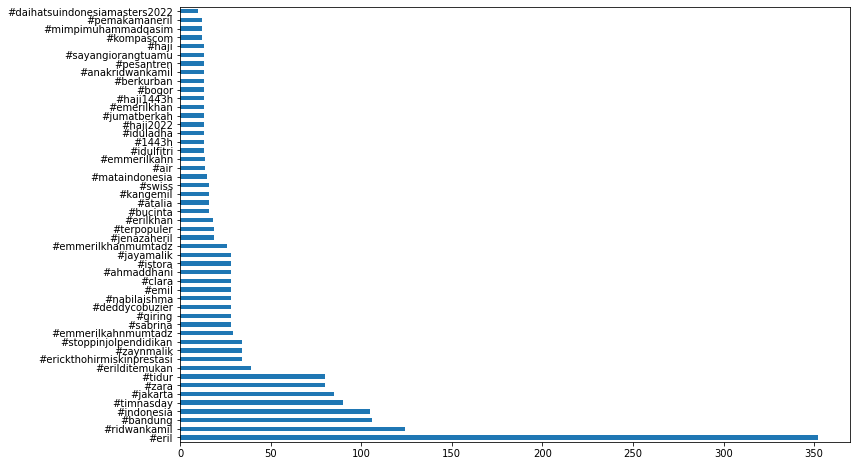

In [ ]:
import pandas as pd

N = 50 # Number of top frequent hashtags to be plotted

dtHT = [x for t in tqdm(HT['hashtags']) for x in t] # any(h not in x for h in HTfilters)
dtHT = pd.Series(dtHT)
dtHT = dtHT.value_counts()
dtHT = dtHT.sort_index()
dtHT = dtHT.sort_values(ascending = False) 
dtHT.to_csv('hashTags_2021.csv', encoding='utf8')
dtHT = dtHT.iloc[:N]

p = dtHT.plot(kind='barh', figsize=(12,8), legend = False)

## SNA

In [ ]:
import graphviz, taudata_sna as tau
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx 
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph

In [ ]:
Tweets = [t['full_text'] for t in T2] # Hanya mengambil tweet
Usernames = [t['user']['screen_name'] for t in T2] # Hanya mengambil username

Please wait, building Graph .... 


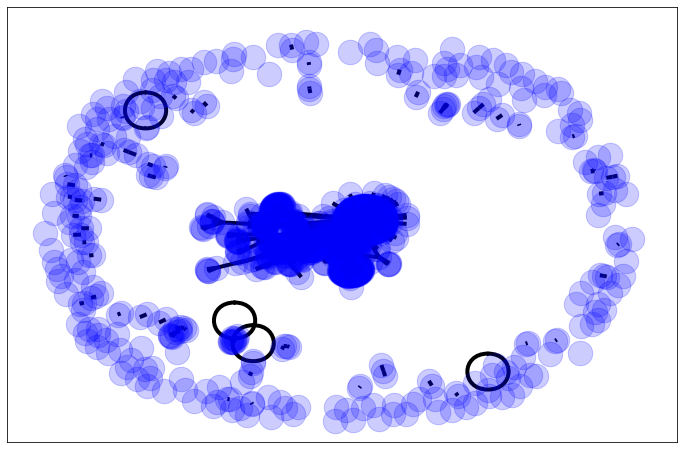

Finished. There are 1862 nodes and 1780 edges in the Graph.


In [ ]:
# Buat graph tweet
plt.subplots(figsize=(12,8))

G = tau.Graph([Usernames,Tweets], Label = False, layOut='spring', plain=True) # layOut = spring, circular, random, shells, spectral

In [ ]:
# Sekarang mari periksa, siapa user paling "penting" di grafik ini?
Gt = tau.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['ridwankamil', 'ainurohman', 'dhitka', 'AREAJULID', 'ata', 'Astridhndyniii', 'KompasTV', 'detikcom', 'Askrlfess', 'Dediy']
Influencial Users Scores: [0.51423966 0.08490059 0.05104782 0.03761419 0.02632993 0.02418055
 0.01934444 0.01934444 0.01558302 0.00913487]


In [ ]:
Gt = tau.Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['ridwankamil', 'dhitka', 'rgnaptr', 'shittdaughter', 'FaraSandy', 'nacyaakarinaa', 'ltlady_', 'ramadhanreinard', 'redcherryrm', 'urmyprince226']
Influencial Users Scores: [0.4715572  0.33979669 0.33410329 0.32808263 0.32739859 0.32244055
 0.32210984 0.32210984 0.32210984 0.32210984]


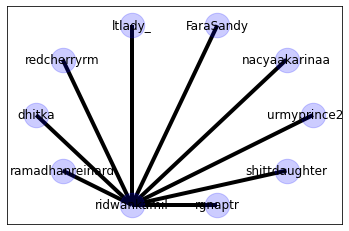

In [ ]:
tau.drawGraph(Gt, True, layOut='circular')

In [ ]:
# Clustering pada Graph = Community Detection
Gt = nx.algorithms.community.greedy_modularity_communities(G)
for community in Gt:
    print(community)

frozenset({'pulvoria', '19miktul', 'ftruntr', 'Mandasulliii', 'nadiaprlx', 'disneytisa', 'AkuOraGagas', 'mynfzys', 'shalsayunitap', 'wildflowir', 'syxaztx', 'fellspeciall', 'akukentankbgt', 'aszara_', 'Ikarahmaw_', 'benedictamnrg', 'dsc_ww7', 'IRamdanisa', 'ayumnh', 'amalianitaw_', 'adnandesfita', 'albirafif4', 'ayinnanya', 'shxx131mby131', 'miracle7stromfl', 'comb8kitty', 'AyiJuf', 'Dedebiosunnah', 'Lvndrbear_', 'siapacip', 'Novi21540792', 't4ehyungq', 'gishellameisafa', 'kikimonde', 'ahcoocha', 'softiemingie', 'namjin1508', 'RullyArwana', 'saniteve', 'jihoneyji', 'iamfeilaa', 'hendriipjms', 'Prilyeahhh', 'Anastas45369606', 'fatihun_ms', 'diarybubblie', 'vizaciakeys', 'vandynah', 'dinarosniarti', 'bunga76gmail1', 'bbybyunb', 'JkV_Gvvlxx', 'ZHKEYUAN', 'Miqbaal22_', '14jae_', 'poteker_dimas', 'Echan176', 'aurelvaniaa1', 'dolorousgurl', 'trzkts', 'zoraleaaa', 'PutriaTyara', 'g7deff', 'Ariefnado10', 'ra_eunhoo', 'taehigh_', 'anastasya_salma', 'MatchaMahek', 'smjynwf', 'ioppiss', 'Dikyardi

## Menampilkan data dalam bentuk tabel

In [ ]:
import pandas as pd
data = pd.read_json('/content/Tweets_Eril.json', lines=True)  # Membuka data
data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,2022-06-12 02:28:21+00:00,1535811211249721344,1535811211249721344,"Bawa Jenazah Eril ke Indonesia, Ridwan Kamil U...",False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
1,2022-06-12 02:28:06+00:00,1535811148360011777,1535811148360011776,Ridwan Kamil Unggah Potret Eril Sebelum Mening...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,...,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
2,2022-06-12 02:27:59+00:00,1535811119268302848,1535811119268302848,RT @AREAJULID: Dis! Dalam kondisi sangat berdu...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,NaN,in,{'created_at': 'Sat Jun 11 04:50:23 +0000 2022...,NaN,NaN,NaN,NaN
3,2022-06-12 02:27:47+00:00,1535811070295670784,1535811070295670784,Jenazah Eril ditemukan guru SD Kamis (9/6). An...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://www.echobox.com"" rel=""nofollo...",NaN,...,0,False,False,0.0,in,NaN,NaN,NaN,NaN,NaN
4,2022-06-12 02:27:42+00:00,1535811047860600832,1535811047860600832,RT @katanya_muslim: Renungan bagi Muslim\n\nGu...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,0.0,in,{'created_at': 'Sun Jun 12 02:19:38 +0000 2022...,"{'media': [{'id': 1535808842092933120, 'id_str...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2022-06-11 17:31:54+00:00,1535676207752413185,1535676207752413184,"RT @ridwankamil: Dear Eril,\n\nRumah akhirmu b...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,NaN,in,{'created_at': 'Sat Jun 11 03:24:18 +0000 2022...,NaN,NaN,NaN,NaN
2496,2022-06-11 17:31:46+00:00,1535676176869765120,1535676176869765120,"RT @ridwankamil: Dear Eril,\nSudah aku siapkan...",False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,NaN,in,{'created_at': 'Sat Jun 11 03:24:17 +0000 2022...,NaN,NaN,NaN,NaN
2497,2022-06-11 17:31:25+00:00,1535676089796022273,1535676089796022272,Menyatu dgn air..Di sungai terindah di dunia.....,False,"[0, 278]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.535675e+18,...,0,False,False,0.0,in,NaN,"{'media': [{'id': 1535676082095296512, 'id_str...",NaN,NaN,NaN
2498,2022-06-11 17:31:15+00:00,1535676045063782400,1535676045063782400,"RT @ridwankamil: Dear Eril,\n\nRumah akhirmu b...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,NaN,in,{'created_at': 'Sat Jun 11 03:24:18 +0000 2022...,NaN,NaN,NaN,NaN


In [ ]:
df = pd.DataFrame(data["full_text"])
dfdata = df.rename(columns={'full_text': 'Tweet'})
dfdata

,Tweet
0,"Bawa Jenazah Eril ke Indonesia, Ridwan Kamil U..."
1,Ridwan Kamil Unggah Potret Eril Sebelum Mening...
2,RT @AREAJULID: Dis! Dalam kondisi sangat berdu...
3,Jenazah Eril ditemukan guru SD Kamis (9/6). An...
4,RT @katanya_muslim: Renungan bagi Muslim\n\nGu...
...,...
2495,"RT @ridwankamil: Dear Eril,\n\nRumah akhirmu b..."
2496,"RT @ridwankamil: Dear Eril,\nSudah aku siapkan..."
2497,Menyatu dgn air..Di sungai terindah di dunia.....
2498,"RT @ridwankamil: Dear Eril,\n\nRumah akhirmu b..."


In [ ]:
dfdata['tweet_cleaned'] = ''
dfdata.head()

,Tweet,tweet_cleaned
0,"Bawa Jenazah Eril ke Indonesia, Ridwan Kamil U...",
1,Ridwan Kamil Unggah Potret Eril Sebelum Mening...,
2,RT @AREAJULID: Dis! Dalam kondisi sangat berdu...,
3,Jenazah Eril ditemukan guru SD Kamis (9/6). An...,
4,RT @katanya_muslim: Renungan bagi Muslim\n\nGu...,


In [ ]:
import taudataDDGsna as tau
for i, d in tqdm(dfdata.iterrows()):
    doc = ' '.join(re.sub(r"(#[A-Za-z0-9]+)|(@\w+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",d.Tweet).split())
    docs = tau.cleanText(doc, fix=slangFixId, lemma=lemmaId, stops=stopId)
    dfdata.at[i, 'tweet_cleaned'] = docs
dfdata.head()

2500it [00:05, 482.81it/s]


,Tweet,tweet_cleaned
0,"Bawa Jenazah Eril ke Indonesia, Ridwan Kamil U...",bawa jenazah eril kah indonesia ridwan kamil u...
1,Ridwan Kamil Unggah Potret Eril Sebelum Mening...,ridwan kamil unggah potret eril tinggal foto g...
2,RT @AREAJULID: Dis! Dalam kondisi sangat berdu...,dis kondisi duka beliau sempat canda skill ken...
3,Jenazah Eril ditemukan guru SD Kamis (9/6). An...,jenazah eril temu guru sd kamis anak ridwan ka...
4,RT @katanya_muslim: Renungan bagi Muslim\n\nGu...,renung muslim gubernur kuwait palestina rizky ...
